## <font color=blue > __Data Science and Machine Learning Capstone Project__



## <font color=red > Question 2: 
###    Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1 ?
    
## <font color=blue > Answer/Solution: 

## <font color=black > __Notebook Content:__
    1.  Install and import required packages for this notebook
    2.  Read Complaints dataset
    3.  Analyse the data to see how best to address the complaints resolution
    3a. Analyse at Borough level
    3b. Analyse at Zip Code level
    3c. Analyse at Street Level
    3d. Analyse at Incident Addresse level
    4.  Data quality observation/exploration and resolution
    5.  Show Street level results and visulization
    6.  Concluding Remarks
    
    
   

  

## <font color=black> __1. Install and import required packages for this notebook__

In [1]:
%%capture
!pip install --upgrade folium
!pip install --upgrade seaborn   
!pip install --upgrade missingno

In [2]:
import pandas as pd
import datetime as dt
import seaborn as sbn
import matplotlib.pyplot as mpltl
import missingno as misno
import numpy as np
import folium


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from IPython.display import display

pd.options.display.float_format = '{:20,.3f}'.format
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 128
np.set_printoptions(precision=3)


## <font color=black > __2. Read Complaints dataset__

In [3]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='e6a--Anonymized for sharing---509', project_access_token='p-48--Anonymized for sharing---d05d')
pc = project.project_context


In [4]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_2 = {
    'IAM_SERVICE_ID': 'iam-S--Anonymized for sharing---5ede9b',
    'IBM_API_KEY_ID': '8tf--Anonymized for sharing---S50',
    'ENDPOINT': 'https://s3.eu-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.eu-de.bluemix.net/oidc/token',
    'BUCKET': 'capstoneproject-donotdelete-pr-vfimqzgikjdisj',
    'FILE': 'fhrw-4uyv.csv'
}


In [5]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ebb4cba47a2749a5bb939e91483a5e2b = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='8tfX--Anonymized for sharing---McnS50',
    ibm_auth_endpoint="https://iam.eu-de.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_ebb4cba47a2749a5bb939e91483a5e2b.get_object(Bucket='capstoneproject-donotdelete-pr-vfimqzgikjdisj',Key='fhrw-4uyv.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

complaints_core_df = pd.read_csv(body)


In [6]:
####  Show the first 5 records in the dataframe to make sure it is loaded.

complaints_core_df.head()


,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-09-11T15:54:19.000,43767067,SAFETY,"10,024.000",147 WEST 80 STREET,WEST 80 STREET,ADDRESS,NEW YORK,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition ...,MANHATTAN,40.783,-73.976,NaN,RESIDENTIAL BUILDING,Open
1,2019-09-11T13:49:51.000,43767116,PLUMBING,"11,225.000",1585 BEDFORD AVENUE,BEDFORD AVENUE,ADDRESS,BROOKLYN,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition ...,BROOKLYN,40.668,-73.956,NaN,RESIDENTIAL BUILDING,Open
2,2019-09-11T18:42:14.000,43765197,SAFETY,"10,037.000",2300 5 AVENUE,5 AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition ...,MANHATTAN,40.816,-73.936,NaN,RESIDENTIAL BUILDING,Open
3,2019-09-11T13:50:49.000,43764415,DOOR/WINDOW,"11,233.000",1766 DEAN STREET,DEAN STREET,ADDRESS,BROOKLYN,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition ...,BROOKLYN,40.676,-73.929,NaN,RESIDENTIAL BUILDING,Open
4,2019-09-11T17:50:31.000,43765661,UNSANITARY CONDITION,"10,460.000",2116 HONEYWELL AVENUE,HONEYWELL AVENUE,ADDRESS,BRONX,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition ...,BRONX,40.845,-73.882,NaN,RESIDENTIAL BUILDING,Open


In [7]:
####  Show number of records and columns in the dataframe

complaints_core_df.shape


(5854002, 15)

In [8]:
####  Create a dataframe containing just HEAT/HOT WATER as this was the top complaint category that was the result from Question 1 

hhw_complaints_core_df = complaints_core_df.loc[(complaints_core_df['complaint_type']=='HEAT/HOT WATER')].copy()
hhw_complaints_core_df.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
10,2019-09-11T15:00:15.000,43765015,HEAT/HOT WATER,"10,019.000",242 WEST 53 STREET,WEST 53 STREET,ADDRESS,NEW YORK,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition ...,MANHATTAN,40.764,-73.984,NaN,RESIDENTIAL BUILDING,Open
17,2019-09-11T16:28:25.000,43766427,HEAT/HOT WATER,"10,460.000",861 CROTONA PARK NORTH,CROTONA PARK NORTH,ADDRESS,BRONX,The complaint you filed is a duplicate of a condition already reported by another tenant for a building-wide condition. The ...,BRONX,40.840,-73.890,NaN,RESIDENTIAL BUILDING,Open
27,2019-09-11T05:35:14.000,43765556,HEAT/HOT WATER,"11,233.000",351 HOWARD AVENUE,HOWARD AVENUE,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a condition already reported by another tenant for a building-wide condition. The ...,BROOKLYN,40.676,-73.919,NaN,RESIDENTIAL BUILDING,Open
43,2019-09-11T06:14:32.000,43765642,HEAT/HOT WATER,"11,208.000",702 ESSEX STREET,ESSEX STREET,ADDRESS,BROOKLYN,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition ...,BROOKLYN,40.666,-73.879,NaN,RESIDENTIAL BUILDING,Open
47,2019-09-11T11:27:51.000,43765019,HEAT/HOT WATER,"11,233.000",351 HOWARD AVENUE,HOWARD AVENUE,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a condition already reported by another tenant for a building-wide condition. The ...,BROOKLYN,40.676,-73.919,NaN,RESIDENTIAL BUILDING,Open


In [9]:
#### Number of "HEAT/HOT WATER" complaints
hhw_complaints_core_df.shape


(1151118, 15)

In [10]:
hhw_complaints_core_df['created_date'] = pd.to_datetime(hhw_complaints_core_df['created_date'], format = '%Y%m%dT%H:%M:%S.%f')
hhw_complaints_core_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1151118 entries, 10 to 5854000
Data columns (total 15 columns):
created_date              1151118 non-null datetime64[ns]
unique_key                1151118 non-null int64
complaint_type            1151118 non-null object
incident_zip              1144056 non-null float64
incident_address          1151118 non-null object
street_name               1151118 non-null object
address_type              1144330 non-null object
city                      1144180 non-null object
resolution_description    1151069 non-null object
borough                   1151118 non-null object
latitude                  1144057 non-null float64
longitude                 1144057 non-null float64
closed_date               1147669 non-null object
location_type             1151118 non-null object
status                    1151118 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(10)
memory usage: 140.5+ MB


In [11]:
#### Number of "HEAT/HOT WATER" complaints
hhw_complaints_core_df.dtypes


created_date              datetime64[ns]
unique_key                         int64
complaint_type                    object
incident_zip                     float64
incident_address                  object
street_name                       object
address_type                      object
city                              object
resolution_description            object
borough                           object
latitude                         float64
longitude                        float64
closed_date                       object
location_type                     object
status                            object
dtype: object

In [12]:
#### 
hhw_complaints_core_df['created_year'] = hhw_complaints_core_df['created_date'].map(lambda x: x.strftime('%Y')).astype(int)
hhw_complaints_core_df['created_month'] = hhw_complaints_core_df['created_date'].map(lambda x: x.strftime('%m')).astype(int)


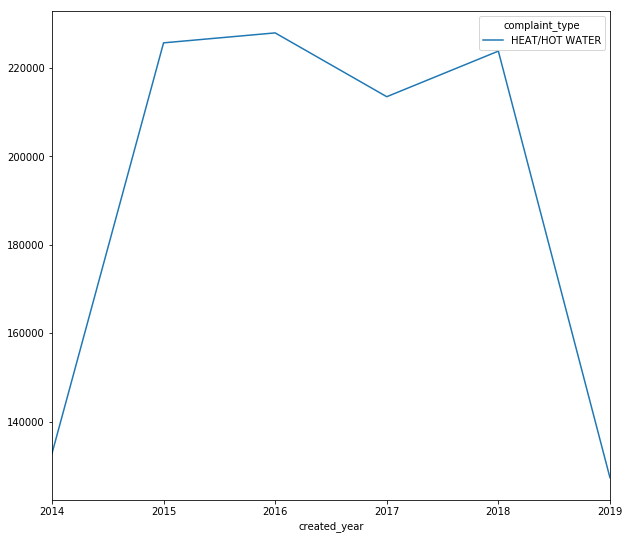

In [13]:
####   Complaints Type "HEAT/HOT WATER" combine and shows figures for full time range

fig, ax = mpltl.subplots(figsize=(10,9))
hhw_complaints_core_df.groupby(['created_year', 'complaint_type']).count()['unique_key'].unstack().plot(ax=ax)


In [14]:
####  Create a new consoldated dataframe to be used for the merge of HEATING','HEAT/HOT WATER' 
####  complaint types that happend 1/1 2014 as show in my response to Question 1.

consolidated_complaints_core_df = complaints_core_df.copy()


In [15]:
consolidated_complaints_core_df.shape

(5854002, 15)

In [16]:
####  Merge the two complaint types.

consolidated_complaints_core_df['complaint_type'] = np.where(consolidated_complaints_core_df['complaint_type']=='HEATING','HEAT/HOT WATER',
                                                             consolidated_complaints_core_df['complaint_type'])


In [17]:
consolidated_hhw_complaints_core_df = consolidated_complaints_core_df.loc[(consolidated_complaints_core_df['complaint_type']=='HEAT/HOT WATER')]
consolidated_hhw_complaints_core_df.shape


(2038987, 15)

In [18]:
#### 
consolidated_hhw_complaints_core_df['created_date'] = pd.to_datetime(consolidated_hhw_complaints_core_df['created_date'], format = '%Y%m%dT%H:%M:%S.%f')
consolidated_hhw_complaints_core_df['created_year'] = consolidated_hhw_complaints_core_df['created_date'].map(lambda x: x.strftime('%Y')).astype(int)
consolidated_hhw_complaints_core_df['created_month'] = consolidated_hhw_complaints_core_df['created_date'].map(lambda x: x.strftime('%m')).astype(int)
complaints_core_df.info()



/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5854002 entries, 0 to 5854001
Data columns (total 15 columns):
created_date              object
unique_key                int64
complaint_type            object
incident_zip              float64
incident_address          object
street_name               object
address_type              object
city                      object
resolution_description    object
borough                   object
latitude                  float64
longitude                 float64
closed_date               object
location_type             object
status                    object
dtypes: float64(3), int64(1), object(11)
memory usage: 669.9+ MB


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


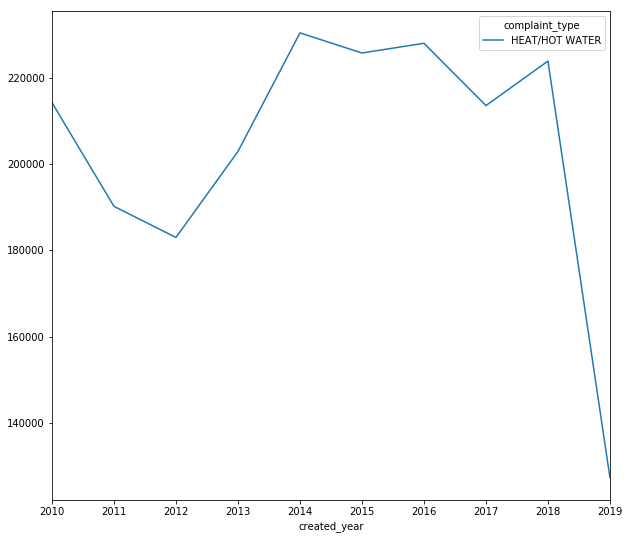

In [19]:
####   Complaints Type "HEAT/HOT WATER" combine and shows figures for full time range

fig, ax = mpltl.subplots(figsize=(10,9))
consolidated_hhw_complaints_core_df.groupby(['created_year', 'complaint_type']).count()['unique_key'].unstack().plot(ax=ax)


## <font color=black > __3. Analyse the data to see how best to address the complaints resolution__

### <font color=black >   __3a. Analyse at Borough level__

    

In [20]:

####   Create a dataframe that hold the number of complaints per Borough for the full period

complaints_grouped_by_borough_df = consolidated_hhw_complaints_core_df.groupby('borough').size().reset_index(name = 
                                                                               'counts').sort_values(by=['counts'], 
                                                                                axis=0,ascending=False)
complaints_grouped_by_borough_df.head(10)


,borough,counts
0,BRONX,569549
1,BROOKLYN,542614
2,MANHATTAN,398236
5,Unspecified,282917
3,QUEENS,228264
4,STATEN ISLAND,17407


#### <font color=green > __Findings:__
#### <font color=green > This is a very large number of complaints in __Bronx & Brooklyn__ followed by __Manhattan.__
#### <font color=green > The numbers at a Borough level is most certainly too large an area to use as a basis for prioritizing the complaints resolution.


### <font color=black >   __3b. Analyse at Zip Code level__


In [21]:
#### Look into the zip codes to see if there are particular zip codes in play.

complaints_grouped_by_zipcode_df = consolidated_hhw_complaints_core_df.groupby('incident_zip').size().reset_index(name='counts').sort_values(by=['counts'], axis=0,ascending=False)
complaints_grouped_by_zipcode_df.head(300)

,incident_zip,counts
125,"11,226.000",65425
80,"10,467.000",62703
71,"10,458.000",62206
81,"10,468.000",54972
66,"10,453.000",54851
65,"10,452.000",47426
37,"10,040.000",43310
70,"10,457.000",43272
28,"10,031.000",42535
69,"10,456.000",42040


#### <font color=green > __Findings:__
#### <font color=green >There is a not a big difference between the top 3-5 zip codes.
    


Text(0.5, 0, 'Incident zip-codes')

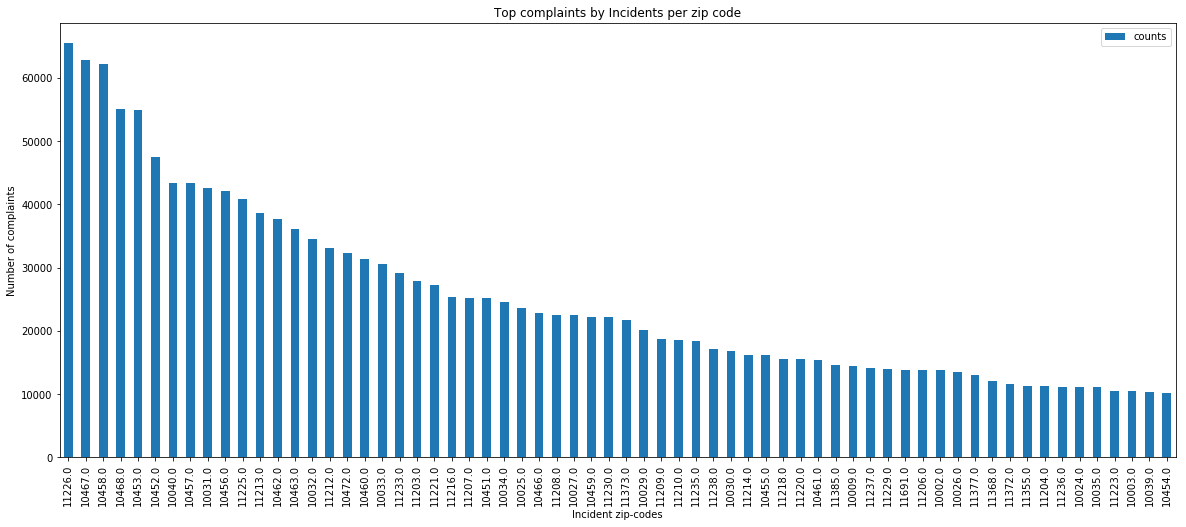

In [22]:
#### Look at the distribution of zipcodes with a high number of complaints.

top_complaints_by_zipcode_df=complaints_grouped_by_zipcode_df.loc[(complaints_grouped_by_zipcode_df['counts']>10000)].set_index('incident_zip')
r=top_complaints_by_zipcode_df.plot(kind='bar', figsize=(20, 8))
mpltl.title('Top complaints by Incidents per zip code')
mpltl.ylabel('Number of complaints')
mpltl.xlabel('Incident zip-codes')


In [23]:
top_complaints_by_zipcode_df.shape

(64, 1)

Text(0.5, 0, 'Incident zip-codes')

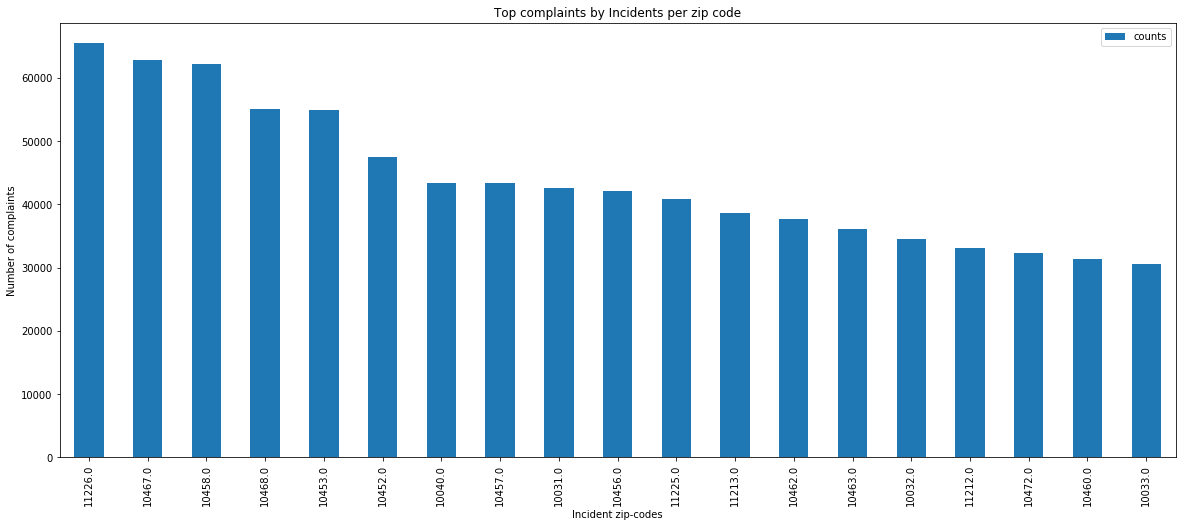

In [24]:
top_complaints_by_zipcode_df=complaints_grouped_by_zipcode_df.loc[(complaints_grouped_by_zipcode_df['counts']>30000)].set_index('incident_zip')
r=top_complaints_by_zipcode_df.plot(kind='bar', figsize=(20, 8))
mpltl.title('Top complaints by Incidents per zip code')
mpltl.ylabel('Number of complaints')
mpltl.xlabel('Incident zip-codes')

In [25]:
top_complaints_by_zipcode_df.shape

(19, 1)

Text(0.5, 0, 'Incident zip-codes')

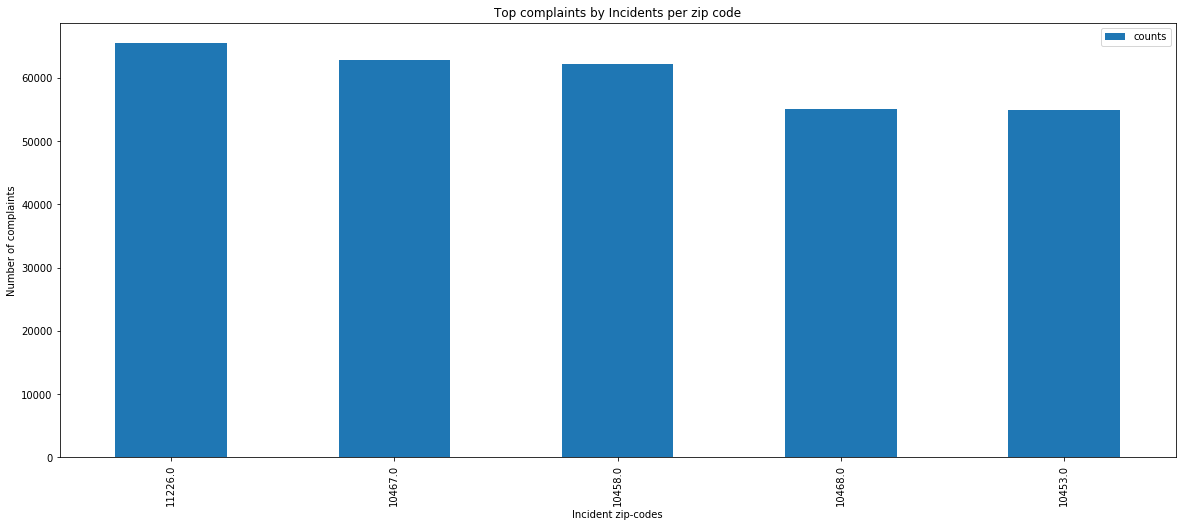

In [26]:
top_complaints_by_zipcode_df = complaints_grouped_by_zipcode_df.loc[(complaints_grouped_by_zipcode_df['counts']>50000)].set_index('incident_zip')
r=top_complaints_by_zipcode_df.plot(kind='bar', figsize=(20, 8))
mpltl.title('Top complaints by Incidents per zip code')
mpltl.ylabel('Number of complaints')
mpltl.xlabel('Incident zip-codes')

In [27]:
top_complaints_by_zipcode_df.shape

(5, 1)

#### <font color=green> __Findings:__
#### <font color=green> There are 65 zip zodes with +10000 complaints, and 19 zip_codes with +30000 comlaints, and 5 zip codes with +50000 complaints 




#### <font color=black >   __3c. Analyse at Street level__


In [28]:
####  Now looks at the data by street_name

top_complainys_by_street_name_df = consolidated_hhw_complaints_core_df.groupby('street_name').size().reset_index(name='counts').sort_values(by=['counts'], 
                                                                                axis=0,ascending=False)
top_complainys_by_street_name_df.head(50)


,street_name,counts
3094,GRAND CONCOURSE,35946
1538,BROADWAY,23482
4185,OCEAN AVENUE,17867
855,ARDEN STREET,15838
4005,MORRIS AVENUE,15768
4908,ST NICHOLAS AVENUE,14943
824,AMSTERDAM AVENUE,11839
2748,ELMHURST AVENUE,10946
1439,BOYNTON AVENUE,10809
2114,DR M L KING JR BOULEVARD,10037


#### <font color=green> __Findings:__
#### <font color=green> __Grand Concourse__ and __BROADWAY__ has a significant number of complaints.


In [29]:
####  Lets take a look at the street and plot a sample of complaints
####  First make sure that lat/long datatypes are floats

consolidated_hhw_complaints_core_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2038987 entries, 10 to 5854000
Data columns (total 17 columns):
created_date              datetime64[ns]
unique_key                int64
complaint_type            object
incident_zip              float64
incident_address          object
street_name               object
address_type              object
city                      object
resolution_description    object
borough                   object
latitude                  float64
longitude                 float64
closed_date               object
location_type             object
status                    object
created_year              int64
created_month             int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(10)
memory usage: 280.0+ MB


In [30]:
####  Convert to floats !

consolidated_hhw_complaints_core_df['latitude'] = pd.to_numeric(consolidated_hhw_complaints_core_df['latitude'])
consolidated_hhw_complaints_core_df['longitude'] = pd.to_numeric(consolidated_hhw_complaints_core_df['longitude'])
consolidated_hhw_complaints_core_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2038987 entries, 10 to 5854000
Data columns (total 17 columns):
created_date              datetime64[ns]
unique_key                int64
complaint_type            object
incident_zip              float64
incident_address          object
street_name               object
address_type              object
city                      object
resolution_description    object
borough                   object
latitude                  float64
longitude                 float64
closed_date               object
location_type             object
status                    object
created_year              int64
created_month             int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(10)
memory usage: 280.0+ MB


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [31]:
complaints_by_street_df = consolidated_hhw_complaints_core_df.loc[(consolidated_hhw_complaints_core_df['street_name']=='GRAND CONCOURSE')].sample(frac=.01).dropna()
complaints_by_street_lat_lon_df = complaints_by_street_df.astype({"latitude": float, "longitude": float})

In [32]:
####  Print 
map_one = folium.Map(location=[np.mean(complaints_by_street_lat_lon_df.latitude), np.mean(complaints_by_street_lat_lon_df.longitude)],zoom_start = 14)

for i in range(complaints_by_street_lat_lon_df.unique_key.count()):
    row = complaints_by_street_lat_lon_df.iloc[i]
    folium.Marker([row.latitude, row.longitude]).add_to(map_one)
    
map_one


#### <font color=green> __Findings:__
#### <font color=green> __Grand Concourse__ is a very long street/boulevard as I remember when driving it !

#### <font color=green> It also seemed to be an "older" housing area and properbly in need of more TLC compared to newer housing estates


In [33]:
complaints_by_street_df = consolidated_hhw_complaints_core_df.loc[(consolidated_hhw_complaints_core_df['street_name']=='BROADWAY')].sample(frac=.01).dropna()
complaints_by_street_lat_lon_df = complaints_by_street_df.astype({"latitude": float, "longitude": float})

In [34]:
####  Print 
map_two = folium.Map(location=[np.mean(complaints_by_street_lat_lon_df.latitude), np.mean(complaints_by_street_lat_lon_df.longitude)],zoom_start = 12)

for i in range(complaints_by_street_lat_lon_df.unique_key.count()):
    row = complaints_by_street_lat_lon_df.iloc[i]
    folium.Marker([row.latitude, row.longitude]).add_to(map_two)
    
map_two


#### <font color=green> __Findings:__
#### <font color=green> The Manhatten __BROADWAY__ looks to have many "HEAT/HOT WATER" complaints, 
#### <font color=green> but is also a very long street and will have less complaints density than __Grand Concourse__

#### <font color=green> The complaints on __BROADWAY's__ in QUEENS looks to have even less complaint density.

    

In [35]:
####   Prepare and look at the "borough", "incident_zip" and "street_name" compare to investigate other areas.

complaints_by_borough_incidentzip_streetname_df = consolidated_hhw_complaints_core_df.groupby(['borough','incident_zip','street_name'], as_index=False, 
                                        group_keys=False)['borough'].agg(['count']).sort_values(by=['count'],
                                        axis=0,
                                        ascending=False)
complaints_by_borough_incidentzip_streetname_df = complaints_by_borough_incidentzip_streetname_df.reset_index()

complaints_by_borough_incidentzip_streetname_df.describe(percentiles = [.10, .20, .30, .40, .50, .60, .70, .80, .90, .98, .983581, .985, .99])



,incident_zip,count
count,"16,730.000","16,730.000"
mean,"10,897.692",120.742
std,536.141,368.800
min,"10,001.000",1.000
10%,"10,032.000",1.000
20%,"10,309.000",3.000
30%,"10,460.000",6.000
40%,"10,473.000",12.000
50%,"11,211.000",21.000
60%,"11,226.000",37.000


#### <font color=green> __Findings:__
#### <font color=green> A small number of __borough, sip, street name__ combinations have a high complaint count compared with the mean.

#### <font color=green> Approx. 1.6% of the __borough, zip, street name__ combinations have more than 1000 complaints.

In [36]:
#### Now looking at the Borough, zip and streets for how many complaints  
complaints_by_borough_incidentzip_streetname_df.head(40)


,borough,incident_zip,street_name,count
0,MANHATTAN,"10,040.000",ARDEN STREET,13438
1,QUEENS,"11,373.000",ELMHURST AVENUE,10733
2,BRONX,"10,472.000",BOYNTON AVENUE,9496
3,BRONX,"10,463.000",BAILEY AVENUE,9081
4,BRONX,"10,451.000",GRAND CONCOURSE,7544
5,BROOKLYN,"11,230.000",OCEAN AVENUE,6261
6,BRONX,"10,468.000",MORRIS AVENUE,6045
7,BRONX,"10,468.000",GRAND CONCOURSE,5867
8,BROOKLYN,"11,226.000",LINDEN BOULEVARD,5858
9,BRONX,"10,467.000",DECATUR AVENUE,5837


#### <font color=green> __Findings:__
    
#### <font color=green> There are 26 borough, zip, street combinations with 4000 or more complaints !

#### <font color=green> and 2 borough, zip, street combinations with 10000 or more complaints !
    
#### <font color=green> -----------------------------------------------------------------------------
    

### <font color=black >   __3d. Analyse at Incident Address level__


In [37]:
####  As an extra check, I will build a dataframe grouped by __incident_address__ only, 
####  to identifying addresses with a high number of complaints.

complaints_by_incidentzip_incident_address_df = consolidated_hhw_complaints_core_df.groupby(['incident_zip','incident_address'], as_index=False, 
                                                group_keys=False)['incident_zip'].agg(['count']).sort_values(by=['count'],
                                                axis=0,
                                                ascending=False)
complaints_by_incidentzip_incident_address_df = complaints_by_incidentzip_incident_address_df.reset_index()



complaints_by_incidentzip_incident_address_df.head(30)


,incident_zip,incident_address,count
0,"10,040.000",34 ARDEN STREET,13584
1,"11,373.000",89-21 ELMHURST AVENUE,10089
2,"10,463.000",3810 BAILEY AVENUE,7088
3,"10,472.000",1025 BOYNTON AVENUE,5771
4,"11,209.000",9511 SHORE ROAD,4375
5,"10,462.000",2090 EAST TREMONT AVENUE,3743
6,"10,451.000",888 GRAND CONCOURSE,3207
7,"10,458.000",2968 PERRY AVENUE,2819
8,"11,377.000",72-10 41 AVENUE,2758
9,"10,462.000",2074 WALLACE AVENUE,2608


## <font color=black>  6. Data quality observation/exploration and resolution


####  <font color=green> __Findings:__
#### <font color=green>The dataset contains 232 records with NaN / nulls that gets included in the groupby which 
#### <font color=green>cause this small discrepency in output at incident_address level and borough/zip/street level

#### <font color=green>This will not have any impact of the comming data exploration and the conlusion that there are individual streets with very 
#### <font color=green>large number of complaints as well as individual adresses with many complaints as well.
    
#### <font color=green>

In [38]:
#### looks to be a small discrepency in the output aboveincident_address level and borough/zip/street level 
#### A quick exploration of data quality issues 

test_1_df = consolidated_hhw_complaints_core_df.loc[consolidated_hhw_complaints_core_df['incident_address'] == '34 ARDEN STREET']
test_1_df.shape


(13816, 17)

In [39]:
#### look at incident address 

test_2_df = test_1_df.groupby(['incident_address','incident_zip'], as_index=False, 
                                                group_keys=False)['incident_address'].agg(['count']).sort_values(by=['count'],
                                                axis=0,
                                                ascending=False)

### test_by_incidentzip_incident_address_df = test_by_incidentzip_incident_address_df.reset_index()
test_2_df.head(10)

,,count
incident_address,incident_zip,
34 ARDEN STREET,"10,040.000",13584


In [40]:
### at the street level

test_3_df =consolidated_hhw_complaints_core_df.loc[consolidated_hhw_complaints_core_df['street_name'] == 'ARDEN STREET']
test_3_df.shape

(15838, 17)

In [41]:
#### at street_name and incident_zip level
test_4_df = test_3_df.groupby(['street_name','incident_zip'], as_index=False, 
                                                group_keys=False)['street_name'].agg(['count']).sort_values(by=['count'],
                                                axis=0,
                                                ascending=False)

test_4_df.head(10)


,,count
street_name,incident_zip,
ARDEN STREET,"10,040.000",15600


In [42]:
### clear all the NaN / null values 

consolidated_hhw_complaints_core_df['incident_address'].replace('', np.nan, inplace=True)
consolidated_hhw_complaints_core_df['street_name'].replace('', np.nan, inplace=True)
consolidated_hhw_complaints_core_df['longitude'].replace('', np.nan, inplace=True)
consolidated_hhw_complaints_core_df['latitude'].replace('', np.nan, inplace=True)
consolidated_hhw_complaints_core_df.dropna(subset = ["incident_address","longitude","latitude"], inplace=True)


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### <font color=green> __Findings:__

#### <font color=green>Some specific incident_address location have a large number of complaints.

#### <font color=green>Comparing the combination of borough, incident_zip and street_name (collected above) with incident_address does give us a close correlation of addresses.

#### <font color=green>The top 5 generally match, with ARDEN STREET and ELMHURST AVENUE are the top complaints performaer.

#### <font color=green>By just looking at these individual streets and addresses its difficult to concluded if this would be an improoved optimization for how the NYC authorities resolve the complaints.

#### <font color=green>Data quality issues in the data set could also prohibit how best to focus on resolutions.

#### <font color=green>To enable this information to be shared/visualized, the maps undernead will show the to individual addresses with most complaints.    
#### <font color=green>----------------------------------------------------------------------------------------------------------------------------------------------------
    

## <font color=black>  __6. Show Street level results and visulization__


In [43]:
consolidated_hhw_complaints_core_df.shape

(2020021, 17)

In [44]:
####   Create a list of the incident_address and add lat/long 
incident_address_list = ('34 ARDEN STREET', '89-21 ELMHURST AVENUE', '3810 BAILEY AVENUE ', '1025 BOYNTON AVENUE', '9511 SHORE ROAD ',
                         '2090 EAST TREMONT AVENUE', '888 GRAND CONCOURSE ', '2968 PERRY AVENUE ', '72-10 41 AVENUE ', '2074 WALLACE AVENUE',
                         '1030 BOYNTON AVENUE', '97 SHERMAN AVENUE', '266 BEDFORD PARK BOULEVARD', '1711 FULTON STREET', '1425 DR M L KING JR BOULEVARD',
                         '2750 HOMECREST AVENUE', '2040 BRONXDALE AVENUE', '750 GRAND CONCOURSE', '30 BUCHANAN PLACE', '3605 SEDGWICK AVENUE',
                         '957 WOODYCREST AVENUE', '2856 WEBB AVENUE', '109 NORTH 7 STREET', '2645 MORRIS AVENUE ', '116 EAST MOSHOLU PARKWAY SOUTH',
                         '2410 WASHINGTON AVENUE', '170 HAWTHORNE STREET', '2913 FOSTER AVENUE', '554 DE KALB AVENUE', '712 CROWN STREET ')

top_incident_address_df = consolidated_hhw_complaints_core_df[consolidated_hhw_complaints_core_df['incident_address'].isin(incident_address_list)].copy()
top_incident_address_subset_df = top_incident_address_df[['incident_address','longitude','latitude']].copy()


In [45]:

top_incident_address_subset_df['incident_address'].replace('', np.nan, inplace=True)
top_incident_address_subset_df['longitude'].replace('', np.nan, inplace=True)
top_incident_address_subset_df['latitude'].replace('', np.nan, inplace=True)
top_incident_address_subset_df.dropna(subset = ["incident_address","longitude","latitude"], inplace=True)

top_incident_address_subset_df.tail(3)

,incident_address,longitude,latitude
5853583,1425 DR M L KING JR BOULEVARD,-73.925,40.843
5853813,2040 BRONXDALE AVENUE,-73.867,40.851
5853984,1425 DR M L KING JR BOULEVARD,-73.925,40.843


In [46]:
top_incident_address_subset_df.shape

(70137, 3)

In [47]:
####  Create a dataframe with incident address, location and count of incident  

street_complaint_df = consolidated_hhw_complaints_core_df.groupby(['incident_address',
                                                                   'longitude',
                                                                   'latitude']).size().reset_index(name='count').sort_values(by = ['count'], 
                                                                    axis=0,
                                                                    ascending=False)

street_complaint_df['incident_address'].replace('', np.nan, inplace=True)
street_complaint_df['longitude'].replace('', np.nan, inplace=True)
street_complaint_df['latitude'].replace('', np.nan, inplace=True)
street_complaint_df.dropna(subset = ["incident_address","longitude","latitude"], inplace=True)

street_complaint_df.head(100)


,incident_address,longitude,latitude,count
81472,34 ARDEN STREET,-73.927,40.862,13584
134530,89-21 ELMHURST AVENUE,-73.877,40.747,10089
88180,3810 BAILEY AVENUE,-73.898,40.884,7088
2403,1025 BOYNTON AVENUE,-73.877,40.825,5749
139152,9511 SHORE ROAD,-74.038,40.616,4375
71831,2968 PERRY AVENUE,-73.884,40.870,2819
134263,888 GRAND CONCOURSE,-73.923,40.827,2791
122637,72-10 41 AVENUE,-73.893,40.745,2758
49807,2074 WALLACE AVENUE,-73.865,40.853,2608
140034,97 SHERMAN AVENUE,-73.925,40.864,2539


In [48]:
####   Make a dataframe for the first 27 incident addresses and convert 
####   data type of longitude and latitude to float so that we can plot them on a map.

street_complaint_df = street_complaint_df.astype({"latitude": float, "longitude": float, "incident_address": object},inplace=True)
street_complaint_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 141581 entries, 81472 to 0
Data columns (total 4 columns):
incident_address    141581 non-null object
longitude           141581 non-null float64
latitude            141581 non-null float64
count               141581 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.4+ MB


In [50]:
####   Plot locations on map of the top 27 addresses that all has more than 1000 complaints

map_three = folium.Map(location=[np.mean(street_complaint_df.latitude), np.mean(street_complaint_df.longitude)],zoom_start = 12)
for i in range(0,26):
    row = street_complaint_df.iloc[i]
    folium.Marker([row.latitude, row.longitude]).add_to(map_three)
    
map_three


## <font color=black>  __6. Concluding Remarks__


<font color=Blue>

### Question 2 - Should The Department of Housing Preservation and Development of New York City focus on any particular set of Boroughs or Zip Code or Streets (where the complaints are severe) for the specific type of Complaints you identified in response to Question 1?

<font color=green>
  
### Answers:

As found in my notebook response to Question 1, the "HEAT/HOT WATER" complaint type was created at start of year 2014 but are the top most often complaint type.

I have merge the "HEATING" and "HEAT/HOT WATER" to be able to get to full list of complaits from 2010 to 13th of September 2019. 
    
The various graphs and maps showm in the notebook provides an overview of the areas that the __Department of Housing 
Preservation and Development of New York City__ authorities should investigate.

There is a very large number of complaints in __Bronx & Brooklyn__ followed by __Manhattan.__
    
__The number of complaints at a Borough level is most certainly too large an area to use as a basis for prioritizing the complaints resolution.__

There are 5 zip zodes with more than 50000 compmplaints, and 19 zip_codes with more 30000 comlaints, and 65 zip codes with  more than 10000 complaints !

The complaints numbers for certain zip codes are certainly quite severe. The complaints at these zip codes could be use for prioritization.

There are 26 borough, zip, street combinations with 4000 or more complaints and 2 borough, zip, street combinations with 10000 or more complaints !

When look at the number of complaints at incident address level there are 27 addresses with more that 1000 complaints for each address.

These 2 addresses: _'34 ARDEN STREET'__ and __'89-21 ELMHURST AVENUE'__ address has  "HEAT/HOT WATER" complaints each with more than 10000 complaints for the full period.

__Overall conclusion:__ 

__There are severe zip codes areas and individual street addresses as shown above in the notebook which could be the place to prioritize for the Department of Housing Preservation and Development of New York City authorities__
    
    
    
